##### Prompt:
###### You are a python programmer with libraries faker, duckdb, parquet and pandas as tools and you are helping me to simulate a comprehensive data warehouse for general insurance organization with sample data having tables like premium register, claim register, customer acquisition table with cost, marketing table with per customer cost and budget, customer demographics table, product table, policy table, customer complaint table, policy / product cancellation table and all such required table, claim fraud table. Further write the code to estimate for each customer customer acquisition cost, customer churn, customer claims, new product marketing cost to customer and finally customer lifetime value 

In [35]:
import pandas as pd
import random
from faker import Faker
import datetime
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

fake = Faker("en_IN")
YEARS=5
# Cities:

1950

datetime.date(2000, 12, 22)

In [43]:

all_cities = {
        "Delhi": "Delhi",
        "Mumbai": "Maharashtra",
        "Bangalore": "Karnataka",
        "Chennai": "Tamil Nadu",
        "Kolkata": "West Bengal",
        "Hyderabad": "Telangana",
        "Pune": "Maharashtra",
        "Ahmedabad": "Gujarat",
        "Surat": "Gujarat",
        "Vadodara": "Gujarat",
        "Indore": "Madhya Pradesh",
        "Jaipur": "Rajasthan",
        "Lucknow": "Uttar Pradesh",
        "Kanpur": "Uttar Pradesh",
        "Coimbatore": "Tamil Nadu",
        "Kochi": "Kerala",
        "Chandigarh": "Chandigarh",
        "Bhubaneswar": "Odisha",
        "Patna": "Bihar",
        "Visakhapatnam": "Andhra Pradesh",
        "Nagpur": "Maharashtra",
        "Nashik": "Maharashtra",
        "Aurangabad": "Maharashtra",
        "Ghaziabad": "Uttar Pradesh",
        "Faridabad": "Haryana",
        "Gurugram": "Haryana"
}

# Generate customer demographics table
def generate_customers(num_customers):
    customers = []
    for _ in range(num_customers):
        City=random.choice(list(all_cities.keys()))
        customer = {
            "Customer_id": fake.uuid4(),
            "First_name": fake.first_name(),
            "Last_name": fake.last_name(),
            "Gender": random.choice(["Male", "Female"]),
            "DOB": fake.date_between(date(1950, 1, 1),date(2006, 1, 1)),
            "City": City,
            "State": all_cities[City]
        }
        customers.append(customer)
    return pd.DataFrame(customers)

# Create 1000 customers
customer_df = generate_customers(1000)
customer_df.head(5)

,Customer_id,First_name,Last_name,Gender,DOB,City,State
0,7b55ce21-db2b-4739-ace9-9908894a25d4,Dipta,Bhatt,Male,1980-04-06,Delhi,Delhi
1,e79a3b50-b428-4b1f-9adb-dba06d8deb14,Chaman,Mukherjee,Male,1971-09-19,Jaipur,Rajasthan
2,e713ad74-4b83-4ab0-89aa-552e2e95cc2d,Pooja,Palan,Male,2005-06-20,Patna,Bihar
3,eccb64b9-0b0a-4d0d-aacd-1dcc1bc024f3,Bahadurjit,Deol,Female,1966-11-18,Gurugram,Haryana
4,4b38e2cc-429e-46a0-bacb-3ef460cd7896,Yamini,Shetty,Female,1989-12-17,Hyderabad,Telangana


In [44]:
# Define  product master table with 20 automobile products and it's pricing based on the Indian automobile make model city 
# 5 health products based on customers age and City
data = {
    'Product ID' : ['AUTO_'+str(i) for i in range(1,51)],
    'Make': ['Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Kia', 'Toyota', 'Maruti Suzuki', 'Honda', 'Renault', 'Nissan', 
            'MG', 'Volkswagen', 'Skoda', 'BMW', 'Mercedes-Benz', 'Audi', 'Volvo', 'Jaguar', 'Land Rover', 'Porsche', 
            'Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Kia', 'Toyota', 'Maruti Suzuki', 'Honda', 'Renault', 'Nissan', 
            'MG', 'Volkswagen', 'Skoda', 'BMW', 'Mercedes-Benz', 'Audi', 'Volvo', 'Jaguar', 'Land Rover', 'Porsche', 
            'Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Kia', 'Toyota', 'Maruti Suzuki', 'Honda', 'Renault', 'Nissan'],
    'Model': ['Swift', 'Creta', 'Nexon', 'Thar', 'Seltos', 'Innova Crysta', 'Dzire', 'City', 'Kiger', 'Magnite', 
            'Hector', 'Polo', 'Octavia', '3 Series', 'C-Class', 'A4', 'XC40', 'F-Pace', 'Discovery', 'Cayenne', 
            'Baleno', 'Verna', 'Punch', 'Scorpio', 'Sonet', 'Fortuner', 'Alto', 'Amaze', 'Triber', 'Kicks', 
            'Gloster', 'Vento', 'Superb', '5 Series', 'E-Class', 'Q5', 'XC60', 'F-Type', 'Defender', '911', 
            'WagonR', 'i20', 'Altroz', 'XUV700', 'Carens', 'Camry', 'Ertiga', 'Jazz', 'Kwid', 'Magnite'],
    'Price (INR)': [600000, 1200000, 800000, 1500000, 1100000, 2000000, 550000, 1400000, 650000, 700000, 
                    1800000, 850000, 2500000, 4500000, 5000000, 4000000, 4200000, 6000000, 8000000, 12000000, 
                    500000, 1000000, 700000, 1800000, 900000, 2800000, 300000, 1150000, 500000, 800000, 
                    3000000, 1000000, 3000000, 5500000, 6000000, 4500000, 4800000, 7000000, 10000000, 
                    400000, 700000, 650000, 2200000, 1000000, 3500000, 600000, 1200000, 400000, 800000,750000]
}
# Create a DataFrame
make_model_master = pd.DataFrame(data)
# Logic behind pricing a policy for make model is models age and price
make_model_master.head(5)

,Product ID,Make,Model,Price (INR)
0,AUTO_1,Maruti Suzuki,Swift,600000
1,AUTO_2,Hyundai,Creta,1200000
2,AUTO_3,Tata,Nexon,800000
3,AUTO_4,Mahindra,Thar,1500000
4,AUTO_5,Kia,Seltos,1100000


In [45]:
data = {
    'Product ID': ['HEALTH_001', 'HEALTH_002', 'HEALTH_003', 'HEALTH_004', 'HEALTH_005'],
    'Product Name': ['Individual Health', 'Family Floater', 'Senior Citizen', 'Critical Illness', 'Top-up'],
    'Description': [
        'Covers medical expenses for a single individual.',
        'Covers medical expenses for the entire family under a single policy.',
        'Specifically designed for individuals aged 60 and above.',
        'Pays a lump-sum benefit upon diagnosis of a critical illness.',
        'Acts as a secondary layer of coverage after the primary insurance is exhausted.'
    ],
    'Target Audience': ['Individuals', 'Families', 'Seniors', 'Individuals', 'Individuals/Families'],
    'Key Features': [
        'Cashless Hospitalization, Daycare Treatment', 
        'Cashless Hospitalization, Maternity Coverage', 
        'Pre-existing Conditions Coverage (with waiting period)', 
        'Coverage for 30+ critical illnesses', 
        'High Sum Insured Options'
    ],
    'Sum Insured Options': ['5L, 10L, 20L', '5L, 10L, 15L, 20L', '5L, 10L, 15L', '5L, 10L', 'High Limits (varies by primary policy)'],
    'Premium Range': ['Low-Medium', 'Medium-High', 'High', 'Medium', 'Low'],
    'Waiting Periods': ['Standard waiting periods', 'Standard waiting periods', 'Reduced waiting periods for some conditions', 'Nil', 'Nil'],
    'Exclusions': [
        'Pre-existing conditions (with some exceptions)', 
        'Cosmetic surgeries, self-inflicted injuries', 
        'Pre-existing conditions (with some exceptions)', 
        'Non-critical illnesses', 
        'Coverage below primary policy limit' 
    ]
}

# Create DataFrame
health = pd.DataFrame(data)
health.head(5)

,Product ID,Product Name,Description,Target Audience,Key Features,Sum Insured Options,Premium Range,Waiting Periods,Exclusions
0,HEALTH_001,Individual Health,Covers medical expenses for a single individual.,Individuals,"Cashless Hospitalization, Daycare Treatment","5L, 10L, 20L",Low-Medium,Standard waiting periods,Pre-existing conditions (with some exceptions)
1,HEALTH_002,Family Floater,Covers medical expenses for the entire family ...,Families,"Cashless Hospitalization, Maternity Coverage","5L, 10L, 15L, 20L",Medium-High,Standard waiting periods,"Cosmetic surgeries, self-inflicted injuries"
2,HEALTH_003,Senior Citizen,Specifically designed for individuals aged 60 ...,Seniors,Pre-existing Conditions Coverage (with waiting...,"5L, 10L, 15L",High,Reduced waiting periods for some conditions,Pre-existing conditions (with some exceptions)
3,HEALTH_004,Critical Illness,Pays a lump-sum benefit upon diagnosis of a cr...,Individuals,Coverage for 30+ critical illnesses,"5L, 10L",Medium,Nil,Non-critical illnesses
4,HEALTH_005,Top-up,Acts as a secondary layer of coverage after th...,Individuals/Families,High Sum Insured Options,High Limits (varies by primary policy),Low,Nil,Coverage below primary policy limit


In [51]:
# Run a campaign for each customer to sell them a automobile and health policy. Some customer will accept some will reject record the offer and customer acquition cost
def run_campaign_with_fake_cost(customer_df, make_model_master, health):
    campaign_data = []

    # Get the date range for the last 5 years
    end_date = date.today()
    start_date = end_date - pd.DateOffset(years=YEARS)  # Approx 5 years ago

    for _, customer in customer_df.iterrows():
        # Randomly select a car model and health insurance product to offer
        car_offer = random.choice(make_model_master['Product ID'].tolist())
        health_offer = random.choice(health['Product ID'].tolist())

        # Simulate the acceptance/rejection of both products
        car_acceptance = "Accepted" if random.random() < 0.7 else "Rejected"
        health_acceptance = "Accepted" if random.random() < 0.6 else "Rejected"
        
        # Fake acquisition cost between ₹300 to ₹1000 using Faker's random_int method
        acquisition_cost = fake.random_int(min=1, max=1000)

        # Generate a random campaign date within the last 5 years
        campaign_date = fake.date_between(start_date=start_date, end_date=end_date)

        # Record the customer data, offers, and outcome
        campaign_data.append({
            "Customer_id": customer['Customer_id'],
            "Automobile Offer": car_offer,
            "Automobile Acceptance": car_acceptance,
            "Health Offer": health_offer,
            "Health Acceptance": health_acceptance,
            "Customer Acquisition Cost (INR)": acquisition_cost/100,
            "Campaign Date": campaign_date
        })

    # Convert to DataFrame
    campaign_df = pd.DataFrame(campaign_data)
    return campaign_df

# Run the campaign with fake acquisition costs for the customer base
campaign_df = run_campaign_with_fake_cost(customer_df, make_model_master, health)

# Display the first few records of the campaign data
campaign_df.head(5)

,Customer_id,Automobile Offer,Automobile Acceptance,Health Offer,Health Acceptance,Customer Acquisition Cost (INR),Campaign Date
0,7b55ce21-db2b-4739-ace9-9908894a25d4,AUTO_28,Rejected,HEALTH_002,Rejected,0.12,2022-09-24
1,e79a3b50-b428-4b1f-9adb-dba06d8deb14,AUTO_3,Rejected,HEALTH_003,Accepted,6.28,2023-04-18
2,e713ad74-4b83-4ab0-89aa-552e2e95cc2d,AUTO_18,Rejected,HEALTH_001,Accepted,1.50,2022-06-05
3,eccb64b9-0b0a-4d0d-aacd-1dcc1bc024f3,AUTO_36,Rejected,HEALTH_001,Accepted,6.26,2021-09-07
4,4b38e2cc-429e-46a0-bacb-3ef460cd7896,AUTO_39,Rejected,HEALTH_005,Accepted,6.56,2022-06-10


In [68]:
# Using above information create a new policy register table for each customer using faker library with start date equal to Campaign Date from campaign_df. For automobile insurance policy premium should be calculated based on make, model, vehicle age, new/old, Kilometers driven, accident=Yes/No etc. Policy Lenght will typically be between 12 Months, 36 Months, 60 Months and is paid annually. For health it should be based on Sum Insured, Top-Up value, Customer's Age, Gender, City etc. Health Insurance Policy is of duration 12 Months paid annually. Do generate seperate policy registers for health and automobile policy. Customers can also possibly renew the policies or cancel the policies in if the policy has expiered.

# Helper function to calculate automobile premium
def calculate_automobile_premium(car_offer, vehicle_age, kilometers_driven, accident):
    # Base premium from the car price
    car_details = make_model_master[make_model_master['Product ID'] == car_offer].iloc[0]
    base_premium = car_details['Price (INR)'] * 0.005  # Example: 5% of car price for premium

    # Factor based on vehicle age
    if vehicle_age < 2:  # New car
        age_factor = 1
    elif 2 <= vehicle_age <= 5:  # 2-5 years old
        age_factor = 1.2
    else:  # Older than 5 years
        age_factor = 1.5

    # Factor based on kilometers driven
    if kilometers_driven < 10000:  # Low usage
        km_factor = 1
    elif 10000 <= kilometers_driven <= 30000:  # Moderate usage
        km_factor = 1.2
    else:  # High usage
        km_factor = 1.5

    # Accident factor
    accident_factor = 1.3 if accident == "Yes" else 1

    # Calculate final premium
    premium = base_premium * age_factor * km_factor * accident_factor
    return premium

# Helper function to calculate health premium
def calculate_health_premium(health_offer, customer_age, gender, city):
    # Health product details
    health_details = health[health['Product ID'] == health_offer].iloc[0]
    
    # Sum Insured based on the selected option
    sum_insured = health_details['Sum Insured Options']
    if '20L' in sum_insured:
        base_premium = 20000
    elif '15L' in sum_insured:
        base_premium = 15000
    else:
        base_premium = 10000

    # Factor based on age
    if customer_age < 30:
        age_factor = 1
    elif 30 <= customer_age <= 50:
        age_factor = 1.5
    else:
        age_factor = 2

    # Factor based on gender (for simplicity)
    gender_factor = 1.1 if gender == 'Male' else 1

    # Factor based on city
    city_factor = 1.2 if city in ['Delhi', 'Mumbai', 'Bangalore'] else 1

    # Calculate final premium
    premium = base_premium * age_factor * gender_factor * city_factor
    return premium

# Function to generate the policy register for each customer
def generate_policy_register(campaign_df, customer_df, make_model_master, health):
    automobile_policy_register = []
    health_policy_register = []
    policy_id_counter = 1  # Policy ID counter to assign unique IDs

    # Iterate over each campaign data entry
    for _, campaign in campaign_df.iterrows():
        customer_id = campaign['Customer_id']
        customer = customer_df[customer_df['Customer_id'] == customer_id].iloc[0]
        
        # For automobile insurance
        car_offer = campaign['Automobile Offer']
        vehicle_age = random.randint(0, 10)  # Random age of the car between 0-10 years
        kilometers_driven = random.randint(5000, 50000)  # Random kilometers driven between 5k-50k km
        accident = random.choice(["Yes", "No"])  # Random accident status
        
        car_premium = calculate_automobile_premium(car_offer, vehicle_age, kilometers_driven, accident)

        # Policy Length: Randomly choose between 12, 36, or 60 months
        policy_length_months = random.choice([12, 36, 60])
        policy_end_date = campaign['Campaign Date'] + pd.DateOffset(months=policy_length_months)

        automobile_policy_register.append({
            "Policy ID": f"AUTO_{policy_id_counter}",
            "Customer_id": customer_id,
            "Product ID": car_offer,
            "Policy Start Date": campaign['Campaign Date'],
            "Policy End Date": policy_end_date,
            "Premium (INR)": round(car_premium, 2),
            "Policy Duration (Months)": policy_length_months,
            "Accident": accident,
            "Kilometers Driven": kilometers_driven,
            "Vehicle Age": vehicle_age,
            "Renewal/Cancellation": "New"
        })

        policy_id_counter += 1

        # For health insurance
        health_offer = campaign['Health Offer']
        customer_age = datetime.now().year - customer['DOB'].year  # Calculate age
        health_premium = calculate_health_premium(health_offer, customer_age, customer['Gender'], customer['City'])

        health_policy_register.append({
            "Policy ID": f"HEALTH_{policy_id_counter}",
            "Customer_id": customer_id,
            "Product ID": health_offer,
            "Policy Start Date": campaign['Campaign Date'],
            "Policy End Date": campaign['Campaign Date'] + pd.DateOffset(months=12),  # Health policy is always 12 months
            "Premium (INR)": round(health_premium, 2),
            "Policy Duration (Months)": 12,
            "Renewal/Cancellation": "New"
        })

        policy_id_counter += 1

    # Convert to DataFrames
    automobile_policy_df = pd.DataFrame(automobile_policy_register)
    health_policy_df = pd.DataFrame(health_policy_register)
    
    # Simulate Renewals and Cancellations
    for df in [automobile_policy_df, health_policy_df]:
        df['Renewal/Cancellation'] = df.apply(lambda x: "Renewed" if x['Policy End Date'] < datetime.now() and random.random() < 0.7 else "Cancelled", axis=1)
        
        # Add reason for cancellation
        df['Cancellation Reason'] = df.apply(
            lambda x: random.choice(['Expired', 'Customer Request', 'High Premium', 'Other']) if x['Renewal/Cancellation'] == "Cancelled" else None, axis=1
        )

    return automobile_policy_df, health_policy_df

# Generate the policy registers for both health and automobile policies
automobile_policy_df, health_policy_df = generate_policy_register(campaign_df, customer_df, make_model_master, health)

Automobile Insurance Policies:


<Axes: >

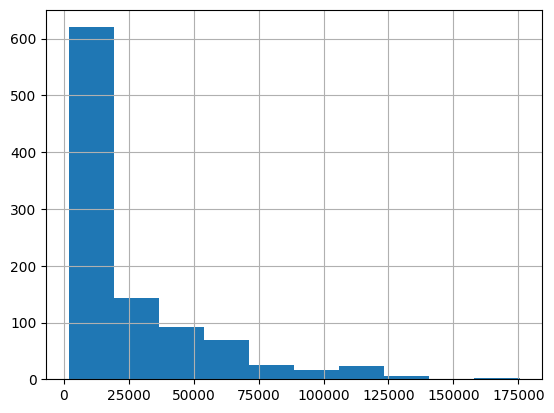

In [69]:

# Display the first few records of the policy registers
print("Automobile Insurance Policies:")
automobile_policy_df.head(5)
automobile_policy_df["Premium (INR)"].hist()



Health Insurance Policies:


<Axes: >

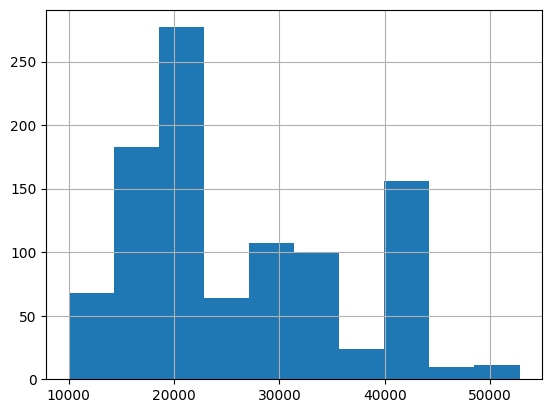

In [70]:
# Display the first few records of the policy registers
print("\nHealth Insurance Policies:")
health_policy_df.head(5)
health_policy_df["Premium (INR)"].hist()

In [71]:
# Add a code to append details of all renewed policy to above automobile_policy_df and health_policy_df

# Function to simulate policy renewals
def simulate_policy_renewals(automobile_policy_df, health_policy_df):
    renewal_data = []
    new_policy_id_counter = max(automobile_policy_df['Policy ID'].apply(lambda x: int(x.split('_')[1])).max(), 
                                health_policy_df['Policy ID'].apply(lambda x: int(x.split('_')[1])).max()) + 1
    
    # Simulate renewals for automobile policies
    for _, policy in automobile_policy_df[automobile_policy_df['Renewal/Cancellation'] == "Renewed"].iterrows():
        # Create renewal policy
        policy_start_date = policy['Policy End Date']
        policy_end_date = policy_start_date + pd.DateOffset(months=policy['Policy Duration (Months)'])
        
        renewal_data.append({
            "Policy ID": f"AUTO_{new_policy_id_counter}",
            "Customer_id": policy['Customer_id'],
            "Product ID": policy['Product ID'],
            "Policy Start Date": policy_start_date,
            "Policy End Date": policy_end_date,
            "Premium (INR)": policy['Premium (INR)'],  # Same premium for renewal
            "Policy Duration (Months)": policy['Policy Duration (Months)'],
            "Accident": policy['Accident'],
            "Kilometers Driven": policy['Kilometers Driven'],
            "Vehicle Age": policy['Vehicle Age'],  # Update vehicle age if needed for renewal
            "Renewal/Cancellation": "Renewed"
        })
        
        new_policy_id_counter += 1

    # Simulate renewals for health policies
    for _, policy in health_policy_df[health_policy_df['Renewal/Cancellation'] == "Renewed"].iterrows():
        # Create renewal policy
        policy_start_date = policy['Policy End Date']
        policy_end_date = policy_start_date + pd.DateOffset(months=12)  # Health policies are always renewed for 12 months
        
        customer = customer_df[customer_df['Customer_id'] == policy['Customer_id']].iloc[0]
        customer_age = datetime.now().year - customer['DOB'].year  # Recalculate age for renewal
        health_premium = calculate_health_premium(policy['Product ID'], customer_age, customer['Gender'], customer['City'])
        
        renewal_data.append({
            "Policy ID": f"HEALTH_{new_policy_id_counter}",
            "Customer_id": policy['Customer_id'],
            "Product ID": policy['Product ID'],
            "Policy Start Date": policy_start_date,
            "Policy End Date": policy_end_date,
            "Premium (INR)": round(health_premium, 2),  # Calculate premium again for renewal
            "Policy Duration (Months)": 12,
            "Renewal/Cancellation": "Renewed"
        })
        
        new_policy_id_counter += 1
    
    # Create new DataFrames for the renewals
    renewal_df = pd.DataFrame(renewal_data)
    # Append renewal data to the original policy DataFrames
    automobile_policy_df = pd.concat([automobile_policy_df, renewal_df[renewal_df['Policy ID'].str.startswith('AUTO')]], ignore_index=True)
    health_policy_df = pd.concat([health_policy_df, renewal_df[renewal_df['Policy ID'].str.startswith('HEALTH')]], ignore_index=True)
    
    return automobile_policy_df, health_policy_df

# Simulate policy renewals and append to the policy register
automobile_policy_df, health_policy_df = simulate_policy_renewals(automobile_policy_df, health_policy_df)

(  Policy ID                           Customer_id Product ID  \
 0    AUTO_1  7b55ce21-db2b-4739-ace9-9908894a25d4    AUTO_28   
 1    AUTO_3  e79a3b50-b428-4b1f-9adb-dba06d8deb14     AUTO_3   
 2    AUTO_5  e713ad74-4b83-4ab0-89aa-552e2e95cc2d    AUTO_18   
 3    AUTO_7  eccb64b9-0b0a-4d0d-aacd-1dcc1bc024f3    AUTO_36   
 4    AUTO_9  4b38e2cc-429e-46a0-bacb-3ef460cd7896    AUTO_39   
 
   Policy Start Date Policy End Date  Premium (INR)  Policy Duration (Months)  \
 0        2022-09-24      2027-09-24       16818.75                        60   
 1        2023-04-18      2026-04-18        6240.00                        36   
 2        2022-06-05      2027-06-05       54000.00                        60   
 3        2021-09-07      2022-09-07       52650.00                        12   
 4        2022-06-10      2025-06-10       90000.00                        36   
 
   Accident  Kilometers Driven  Vehicle Age Renewal/Cancellation  \
 0      Yes            40376.0          7.0         

In [72]:

# Display the first few records of the updated policy registers with renewals
automobile_policy_df.head(5)

,Policy ID,Customer_id,Product ID,Policy Start Date,Policy End Date,Premium (INR),Policy Duration (Months),Accident,Kilometers Driven,Vehicle Age,Renewal/Cancellation,Cancellation Reason
0,AUTO_1,7b55ce21-db2b-4739-ace9-9908894a25d4,AUTO_28,2022-09-24,2027-09-24,16818.75,60,Yes,40376.0,7.0,Cancelled,Customer Request
1,AUTO_3,e79a3b50-b428-4b1f-9adb-dba06d8deb14,AUTO_3,2023-04-18,2026-04-18,6240.00,36,Yes,9353.0,2.0,Cancelled,Customer Request
2,AUTO_5,e713ad74-4b83-4ab0-89aa-552e2e95cc2d,AUTO_18,2022-06-05,2027-06-05,54000.00,60,No,35008.0,5.0,Cancelled,Expired
3,AUTO_7,eccb64b9-0b0a-4d0d-aacd-1dcc1bc024f3,AUTO_36,2021-09-07,2022-09-07,52650.00,12,Yes,40200.0,4.0,Cancelled,Customer Request
4,AUTO_9,4b38e2cc-429e-46a0-bacb-3ef460cd7896,AUTO_39,2022-06-10,2025-06-10,90000.00,36,No,18249.0,7.0,Cancelled,High Premium


In [73]:
health_policy_df.head(5)


,Policy ID,Customer_id,Product ID,Policy Start Date,Policy End Date,Premium (INR),Policy Duration (Months),Renewal/Cancellation,Cancellation Reason,Accident,Kilometers Driven,Vehicle Age
0,HEALTH_2,7b55ce21-db2b-4739-ace9-9908894a25d4,HEALTH_002,2022-09-24,2023-09-24,39600.0,12,Renewed,None,NaN,NaN,NaN
1,HEALTH_4,e79a3b50-b428-4b1f-9adb-dba06d8deb14,HEALTH_003,2023-04-18,2024-04-18,33000.0,12,Renewed,None,NaN,NaN,NaN
2,HEALTH_6,e713ad74-4b83-4ab0-89aa-552e2e95cc2d,HEALTH_001,2022-06-05,2023-06-05,22000.0,12,Cancelled,Other,NaN,NaN,NaN
3,HEALTH_8,eccb64b9-0b0a-4d0d-aacd-1dcc1bc024f3,HEALTH_001,2021-09-07,2022-09-07,40000.0,12,Renewed,None,NaN,NaN,NaN
4,HEALTH_10,4b38e2cc-429e-46a0-bacb-3ef460cd7896,HEALTH_005,2022-06-10,2023-06-10,15000.0,12,Renewed,None,NaN,NaN,NaN


In [ ]:
#